In [ ]:
import numpy as np
import keras
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# 데이터 확인

In [ ]:
x_data = np.load('x_data_all.npy')
t_data = np.load('t_data_all.npy')

In [ ]:
print(x_data.shape)
print(t_data.shape)

(73254, 32, 32, 3)
(73254,)


In [ ]:
t_data

array([1, 9, 2, ..., 1, 6, 9], dtype=int64)

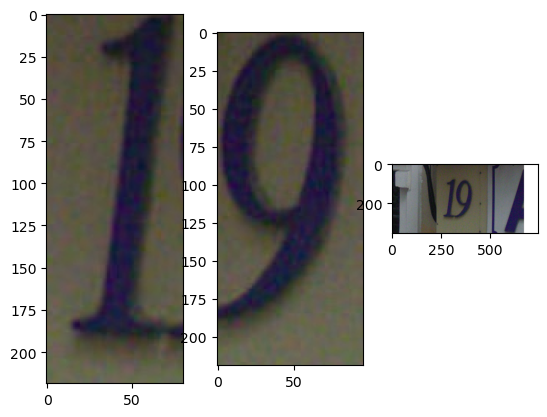

In [ ]:
# 이미지 크롭 확인

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("./data/데이터톤 테스트셋 image/1.png")


fig = plt.figure()
axs = []

for i in range(3):
  axs.append(fig.add_subplot(1,3,i+1))

crop_img = image.crop((246, 77, 246+81, 77+219))  # (가로 시작픽셀, 세로 시작픽셀, 가로 끝픽셀, 세로 끝픽셀) / (left, top, left + width, top + height)
axs[0].imshow(crop_img)


crop_img = image.crop((323, 81, 323+96, 81+219))
axs[1].imshow(crop_img)


axs[2].imshow(image)
plt.show()

# 모델

In [2]:
# 데이터 로드
x_data = np.load('./npy/x_data_all.npy')
t_data = np.load('./npy/t_data_all.npy')

1


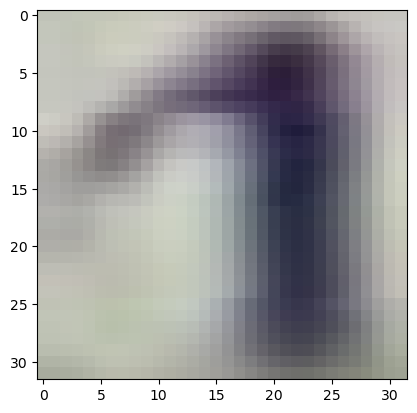

In [5]:
num = 65443

plt.imshow(x_data[num])
print(t_data[num])
plt.show()

In [3]:
# 정규화
x_data = x_data.astype('float64')
x_data /= 255.0

In [4]:
# one hot encoding
lb = LabelBinarizer()
t_data = lb.fit_transform(t_data)

In [5]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(x_data,
                                                  t_data,
                                                  test_size=0.15,
                                                  random_state=22)

In [6]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [7]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), padding='same',
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,  activation='softmax')
])

# early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(
                   './models/best_cnn.h5',
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\youngjae\miniconda3\envs\dt\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=70, validation_data=(X_val, y_val),
                              callbacks=[model_checkpoint])

Epoch 1/70


C:\Users\youngjae\AppData\Local\Temp\ipykernel_37208\1910126075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),


487/487 [==============================] - 29s 49ms/step - loss: 2.2037 - accuracy: 0.2005 - val_loss: 1.9824 - val_accuracy: 0.2619
Epoch 2/70
487/487 [==============================] - 25s 52ms/step - loss: 1.6880 - accuracy: 0.3752 - val_loss: 1.0913 - val_accuracy: 0.6612
Epoch 3/70
487/487 [==============================] - 26s 54ms/step - loss: 1.0479 - accuracy: 0.6445 - val_loss: 0.4553 - val_accuracy: 0.8670
Epoch 4/70
487/487 [==============================] - 29s 60ms/step - loss: 0.5558 - accuracy: 0.8343 - val_loss: 0.3359 - val_accuracy: 0.9033
Epoch 5/70
487/487 [==============================] - 18s 38ms/step - loss: 0.4301 - accuracy: 0.8748 - val_loss: 0.2898 - val_accuracy: 0.9192
Epoch 6/70
487/487 [==============================] - 18s 37ms/step - loss: 0.3781 - accuracy: 0.8904 - val_loss: 0.3054 - val_accuracy: 0.9089
Epoch 7/70
487/487 [==============================] - 18s 37ms/step - loss: 0.3445 - accuracy: 0.9007 - val_loss: 0.2640 - val_accuracy: 0.9221
Epo

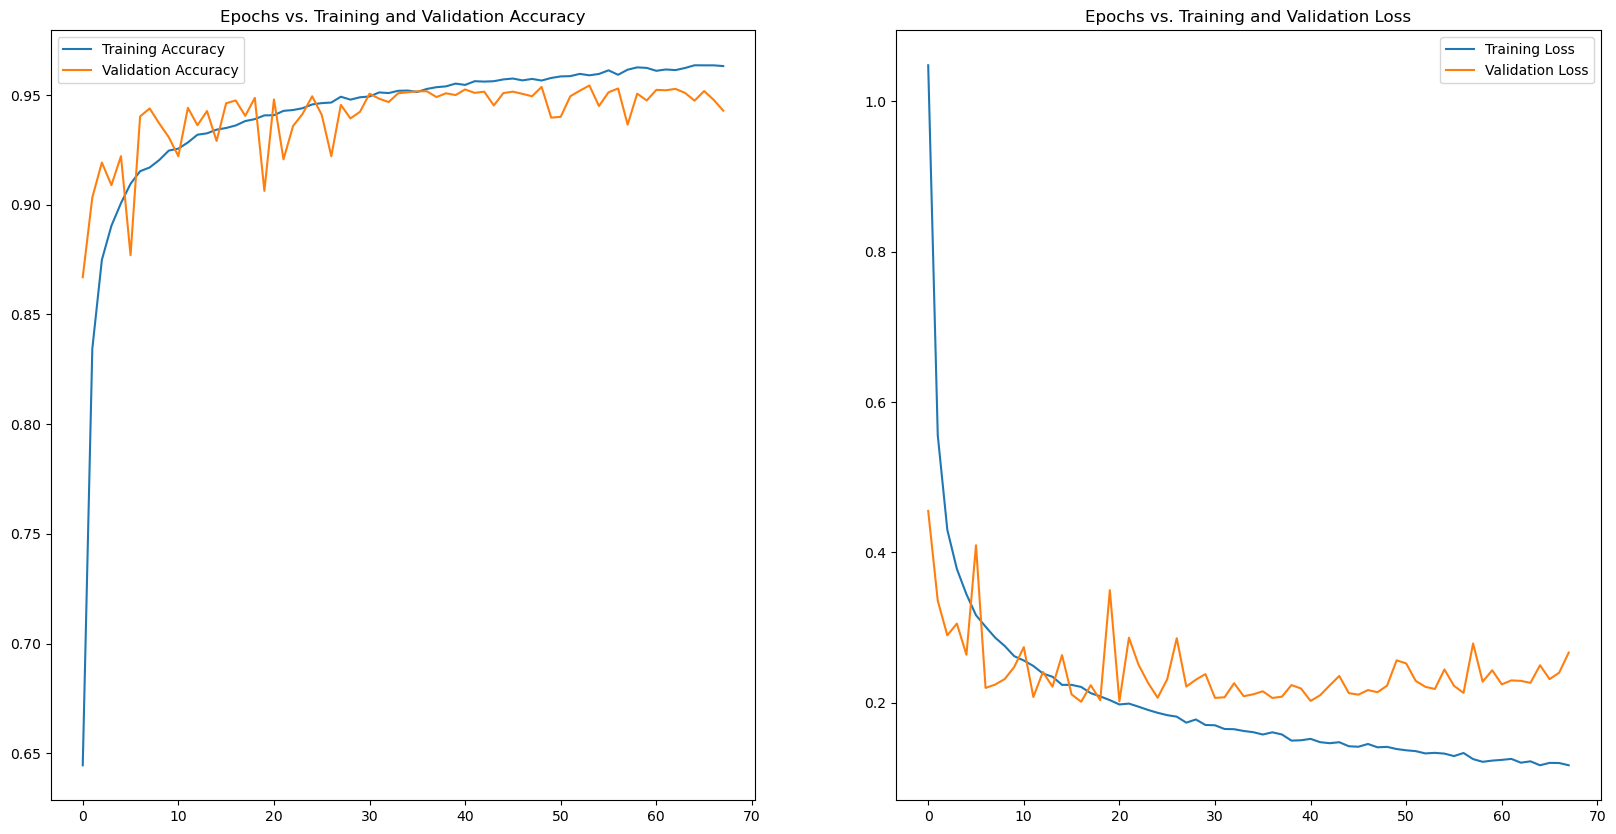

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc[2:], label='Training Accuracy')
plt.plot(val_acc[2:], label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss[2:], label='Training Loss')
plt.plot(val_loss[2:], label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [16]:
# test 데이터 로드

data = pd.read_csv("./csv/data.csv")

data.columns

Index(['파일명', 'height', 'left', 'top', 'width', 'label '], dtype='object')

In [17]:
# 데이터 전처리
loc = "./data/데이터톤 테스트셋 image/"

from PIL import Image

def get_data(df, loc):

  x_data = []
  t_data = []

  for index, row in df.iterrows():
    # csv파일의 데이터들을 분류
    img = row["파일명"]
    left = row["left"]
    upper = row["top"]
    right = left + row["width"]
    lower = upper + row["height"]
    number = row["label "]

    image = Image.open(f"{loc}/{img}")  # 이미지 불러오기
    num_img = image.crop((left, upper, right, lower))  # 이미지에서 숫자영역 크롭
    resize_img = num_img.resize((32, 32))  # 크롭된 이미지 리사이징(32, 32)
    img_data = np.array(resize_img)  # np array 픽셀 데이터로 변환

    x_data.append(img_data)
    t_data.append(number)

  x_data = np.array(x_data)
  t_data = np.array(t_data)

  return x_data, t_data

x_test, t_test = get_data(data,loc)

In [3]:
from keras.models import load_model
loaded_model = load_model("./models/all_model.h5")
x_test = np.load("./x_data2.npy")
t_test = np.load("./t_data2.npy")

In [4]:
# 정규화
x_test = x_test.astype('float64')
x_test /= 255.0

In [5]:
# one hot encoding
lb = LabelBinarizer()
t_test = lb.fit_transform(t_test)

In [7]:
test_loss, test_acc = loaded_model.evaluate(x=x_test, y=t_test, verbose=1)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

814/814 [==============================] - 7s 3ms/step - loss: 0.2308 - accuracy: 0.9521
Test accuracy is: 0.9521 
Test loss is: 0.2308


# MNIST

In [4]:
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [5]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (32,32,3)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (32,32,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))



In [6]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])

c:\Users\youngjae\miniconda3\envs\dt\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [9]:
# 데이터 로드
x_data = np.load('./npy/x_data_all.npy')
t_data = np.load('./npy/t_data_all.npy')

In [10]:
# 정규화
x_data = x_data.astype('float64')
x_data /= 255.0

In [11]:
# one hot encoding
lb = LabelBinarizer()
t_data = lb.fit_transform(t_data)

In [12]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(x_data,
                                                  t_data,
                                                  test_size=0.15,
                                                  random_state=22)

In [14]:
datagen = ImageDataGenerator(
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1)  


In [16]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=112),
                              epochs = 30, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 112
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


C:\Users\youngjae\AppData\Local\Temp\ipykernel_15884\3145858797.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=112),


555/555 - 22s - loss: 1.3230 - accuracy: 0.5577 - val_loss: 0.5034 - val_accuracy: 0.8466 - lr: 0.0010 - 22s/epoch - 39ms/step
Epoch 2/30
555/555 - 19s - loss: 0.6323 - accuracy: 0.8040 - val_loss: 0.3279 - val_accuracy: 0.9024 - lr: 0.0010 - 19s/epoch - 33ms/step
Epoch 3/30
555/555 - 19s - loss: 0.5082 - accuracy: 0.8446 - val_loss: 0.3072 - val_accuracy: 0.9115 - lr: 0.0010 - 19s/epoch - 35ms/step
Epoch 4/30
555/555 - 18s - loss: 0.4625 - accuracy: 0.8598 - val_loss: 0.3345 - val_accuracy: 0.9032 - lr: 0.0010 - 18s/epoch - 32ms/step
Epoch 5/30
555/555 - 18s - loss: 0.4342 - accuracy: 0.8686 - val_loss: 0.3198 - val_accuracy: 0.9064 - lr: 0.0010 - 18s/epoch - 32ms/step
Epoch 6/30
555/555 - 18s - loss: 0.4172 - accuracy: 0.8751 - val_loss: 0.2874 - val_accuracy: 0.9188 - lr: 0.0010 - 18s/epoch - 32ms/step
Epoch 7/30
555/555 - 18s - loss: 0.4090 - accuracy: 0.8783 - val_loss: 0.2675 - val_accuracy: 0.9274 - lr: 0.0010 - 18s/epoch - 33ms/step
Epoch 8/30
555/555 - 19s - loss: 0.4112 - acc

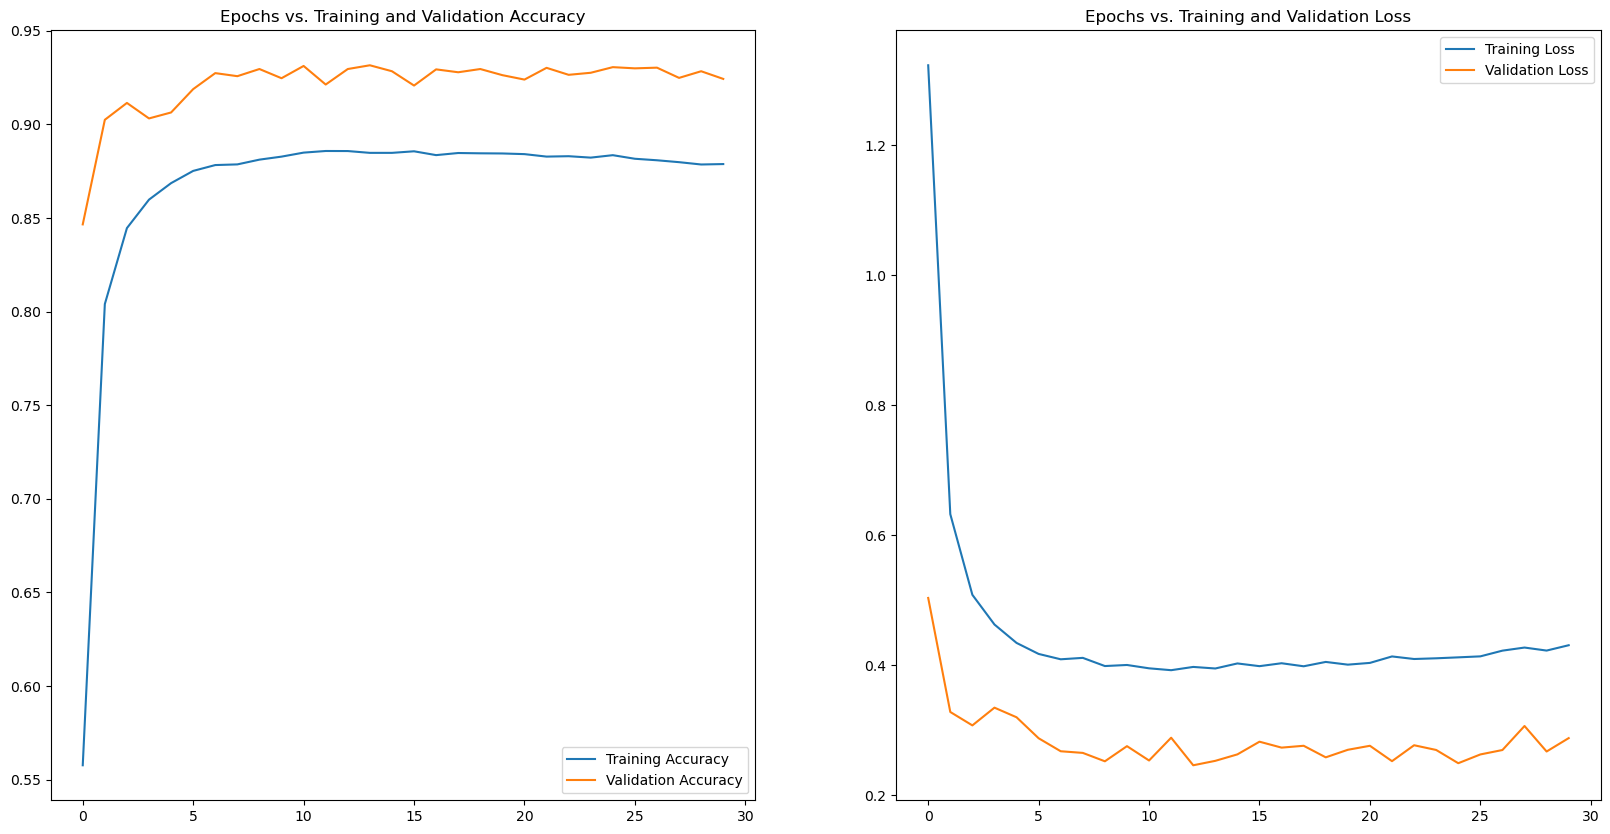

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [18]:
# test 데이터 로드

data = pd.read_csv("./csv/data.csv")

data.columns

Index(['파일명', 'height', 'left', 'top', 'width', 'label '], dtype='object')

In [20]:
# 데이터 전처리
loc = "./data/데이터톤 테스트셋 image/"

from PIL import Image

def get_data(df, loc):

  x_data = []
  t_data = []

  for index, row in df.iterrows():
    # csv파일의 데이터들을 분류
    img = row["파일명"]
    left = row["left"]
    upper = row["top"]
    right = left + row["width"]
    lower = upper + row["height"]
    number = row["label "]

    image = Image.open(f"{loc}/{img}")  # 이미지 불러오기
    num_img = image.crop((left, upper, right, lower))  # 이미지에서 숫자영역 크롭
    resize_img = num_img.resize((32, 32))  # 크롭된 이미지 리사이징(32, 32)
    img_data = np.array(resize_img)  # np array 픽셀 데이터로 변환

    x_data.append(img_data)
    t_data.append(number)

  x_data = np.array(x_data)
  t_data = np.array(t_data)

  return x_data, t_data

x_test, t_test = get_data(data,loc)

In [21]:
# 정규화
x_test = x_test.astype('float64')
x_test /= 255.0

In [22]:
# one hot encoding
lb = LabelBinarizer()
t_test = lb.fit_transform(t_test)

In [23]:
test_loss, test_acc = model.evaluate(x=x_test, y=t_test, verbose=1)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

15/15 [==============================] - 0s 13ms/step - loss: 0.2902 - accuracy: 0.9250
Test accuracy is: 0.9250 
Test loss is: 0.2902
